In [6]:
import numpy as np                # import numpy package
from sympy import *               # import symbolic package
from scipy.stats import binom     # import binomial distribution 
from scipy.stats import norm      # import normal distribution 
from scipy.stats import hypergeom # import hypergeometry distribution 
import matplotlib.pyplot as plt   # import plotting package
from IPython.display import *     # import display package
init_printing(use_latex=True)     # import printing function of latex text
%matplotlib inline                

Examples of continuous probability distributions are:

    norm : Normal or Gaussian
    chi2 : Chi-squared
    t : Student’s T
    uniform : Uniform

Examples of discrete probability distributions are:

    binom : Binomial
    poisson : Poisson

Examples of statistical functions:

    mode : Modal value
    moment : central moment
    describe: descriptive statistics
    histogram: histogram of data


# Binomial Distribution

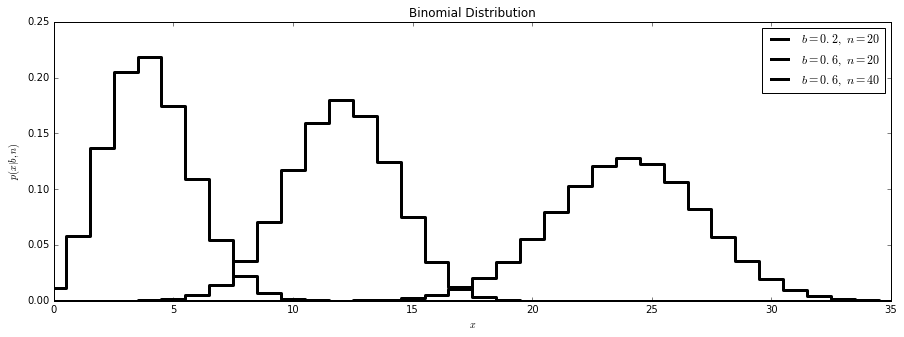

Probability Mass Function of 5 is: 0.174559521557
Comulative Distribution function of 5 is: 0.80420778546


In [8]:
n_values = [20, 20, 40]          # list of number of trials of binomial experiment 
b_values = [0.2, 0.6, 0.6]       # list of P(success) of bernoulli experiment 
linestyles = ['-', '--', ':']    # list of different line styles 
x = np.arange(0, 40)             # generate list of numbers from 0:39 with step of 1

fig, ax = plt.subplots(figsize=(15, 5)) # figure handles 

# zip is used in order to loop over multiple lists of same length
for (n, b, ls) in zip(n_values, b_values, linestyles): 
    
    dist = binom(n, b)       # create a binomial distribution
    # plot probability mass function of each distribution with the corresponding parameters 
    ax.plot(x, dist.pmf(x), ls=ls, c='black', lw = 3,
             label=r'$b=%.1f,\ n=%i$' % (b, n), linestyle='steps-mid')

plt.xlim(0, 35)              # limits of x-axis 
plt.ylim(0, 0.25)            # limits of y-axis 
 
plt.xlabel('$x$')            # label of x-axis 
plt.ylabel(r'$p(x|b, n)$')   # label of y-axis 
plt.title('Binomial Distribution') # title of the figure
ax.legend()                     # Show legend on the figure 
plt.show()                      # Show legend on the figure 

dist = binom(n_values[0], b_values[0]) # initialize a distribution with n = 20, b = 0.2

# Probability Mass Function 
print 'Probability Mass Function of 5 is: {v}'.format(v = dist.pmf(5))
# Comulative Distribution Function
print 'Comulative Distribution function of 5 is: {v}'.format(v = dist.cdf(5))

# Normal Distribution

<IPython.core.display.Latex object>

Probability Density Function of 0.4 is: 0.579383105523
Comulative Distribution function of 0.4 is: 0.788144601417


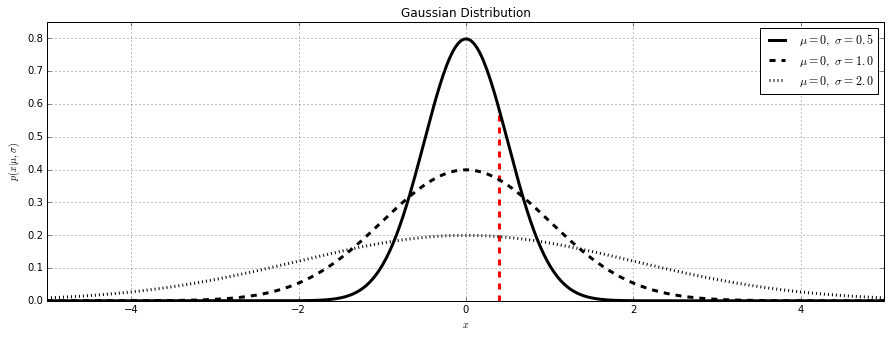

In [9]:
ltx = '$ pdf(x,\\mu,\\sigma) = \\frac{1}{ \\sigma' + \
 '\\sqrt{2 \\pi}} e^{\\left(-\\frac{{\\left(\\mu - ' + \
 'x\\right)}^{2}}{2 \\, \\sigma^{2}}\\right)}$'

display(Latex(ltx)) # to display gaussian distribution equation 

# Comulative Distribution Function
mu =0                                            # mean
sigma_values = [0.5, 1.0, 2.0]                   # list of standard deviations 
linestyles = ['-', '--', ':']                    # list of different line styles
x = np.linspace(-10, 10,1000)                    # generate list of data from -10:10 with 1000 point

fig, ax = plt.subplots(figsize=(15, 5))          # figure handles 

# zip is used in order to loop over multiple lists of same length
for (sigma, ls) in zip(sigma_values, linestyles):
   
    dist = norm(mu, sigma)  # create a normal distribution
    # plot probability mass function of each distribution with the corresponding parameters 
    ax.plot(x, dist.pdf(x), ls=ls, c='black',lw=3,
             label=r'$\mu=%i,\ \sigma=%.1f$' % (mu, sigma))


plt.xlim(-5, 5)
plt.ylim(0, 0.85)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')
plt.grid(True)
ax.legend()

dist = norm(mu, sigma_values[0])          # initialize a distribution with mu = 0, sigma = 0.5
# Probability Density Function.
print 'Probability Density Function of 0.4 is: {v}'.format(v = dist.pdf(0.4))
ax.vlines(0.4,0,dist.pdf(0.4),colors='r', linestyles='--', lw=3)
# Comulative Distribution Function
print 'Comulative Distribution function of 0.4 is: {v}'.format(v = dist.cdf(0.4))

plt.show()

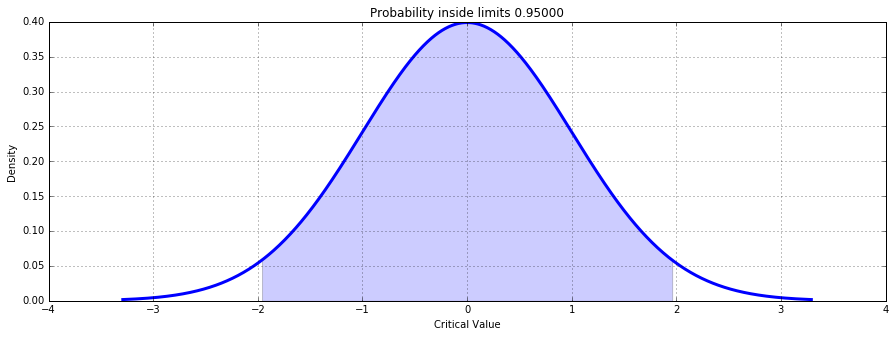

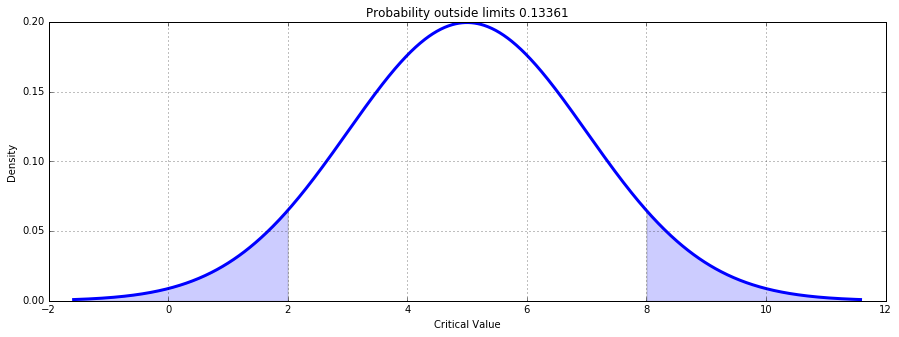

In [12]:
def normspec(interval = [-1,1], mu=0,sigma = 1,region = 'inside'):
    
    """
    This function plot the area between a given interval on the pdf of normal distribution 
    also calculate the cdf probability inside or outside the given interval 
    
    interval : a given interval to calcualate cdf inside or outside. default: interval = [-1,1]
    mu: mean of the normal distribution. default: mu=0
    sigma: standard deviation of the normal distribution. defult: sigma = 1
    region: either 'inside' or 'ouside'. default: region = 'inside'
    
    """
    dist = norm(mu,sigma)              # initialize a distribution with given mu, sigma
    x_min, x_max = dist.interval(0.999) # get min and max of the generated distribution 
    x = np.linspace(x_min,x_max,1000)   # generate list of data from x_min:x_max with 1000 point
    fig, ax = plt.subplots(figsize=(15, 5)) # figure handles 
    ax.plot(x,dist.pdf(x),ls = '-', color = 'b', lw = 3) # plot pdf probability 
    p0 = dist.cdf(interval[0])              #calculate cdf probability of interval[0]
    p1 = dist.cdf(interval[1])              #calculate cdf probability of interval[1]
     
    if region == 'inside':
        interval_min,interval_max = interval[0], interval[1]    # region where to calucate cdf
        interval_x = np.linspace(interval_min,interval_max,1000) # generate list of data from with 1000 point
        ax.fill_between(interval_x,dist.pdf(interval_x),alpha = 0.2) # plot shaded area between intervals
        probability =  abs(p1 - p0)   # inside cdf probability of the given interval 
    
    elif region == 'outside':
        interval_min1,interval_max1 = interval[1],x_max # region where to calucate cdf (right)
        interval_min2,interval_max2 = x_min, interval[0] # region where to calucate cdf (left)
        interval_x1 = np.linspace(interval_min1,interval_max1,1000) # generate list of data from with 1000 point
        interval_x2 = np.linspace(interval_min2,interval_max2,1000) # generate list of data from with 1000 point
        ax.fill_between(interval_x1,dist.pdf(interval_x1),alpha = 0.2) # plot shaded area to the right 
        ax.fill_between(interval_x2,dist.pdf(interval_x2),alpha = 0.2) # plot shaded area to the left
        probability =  1- abs(p1 - p0) # outside cdf probability of the given interval 
        
    
    plt.xlabel('Critical Value')
    plt.ylabel('Density')
    plt.title('Probability %s limits %2.5f' %(region,probability))
    plt.grid(True)
    plt.show()
    
#function calling 
normspec(interval = [-1.96,1.96], mu=0,sigma = 1); 
normspec(interval = [2,8], mu=5,sigma = 2,region= 'outside');

# Hypergeometric Distribution


    N: The number of items in the population.
    k: The number of items in the population that are classified as successes.
    n: The number of items in the sample.
    x: The number of items in the sample that are classified as successes.
    kCx: The number of combinations of k things, taken x at a time.
    h(x; N, n, k): hypergeometric probability - the probability that an n-trial hypergeometric experiment results in exactly x successes, when the population consists of N items, k of which are classified as successes.


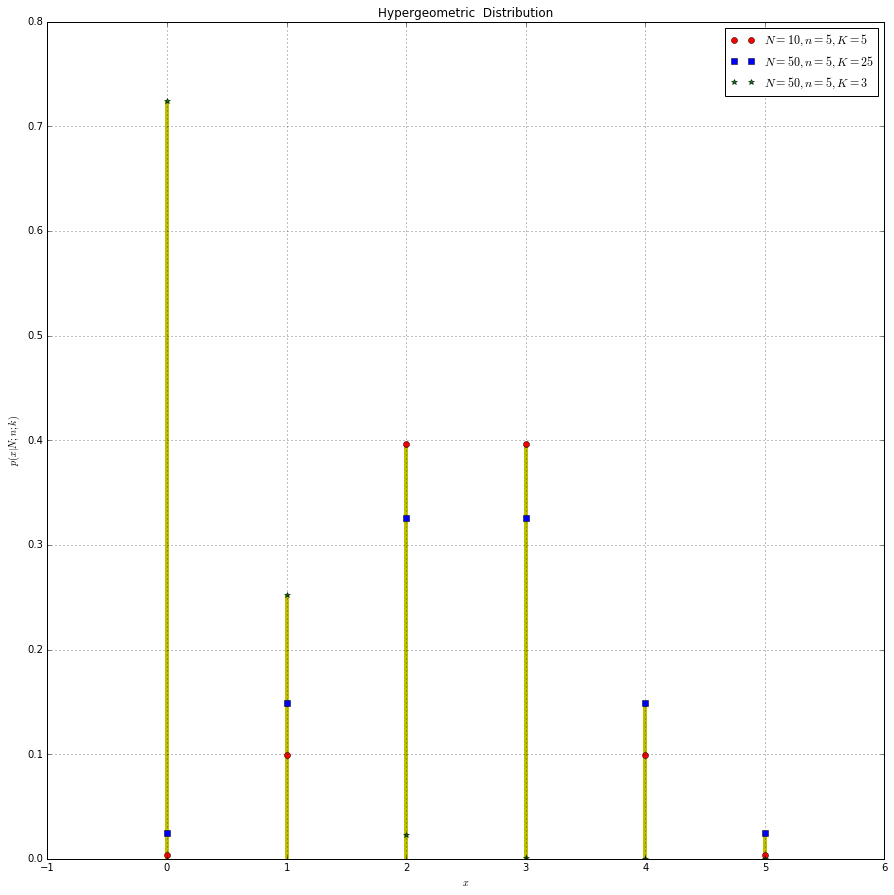

Probability Mass Function of 3 is: 0.396825396825
Comulative Distribution function of 3 is: 0.896825396825


In [14]:
N_values = [10, 50, 50]        # list of the number of items in the population 
n_values = [5, 5, 5]           # list of the number of items in the sample 
K_values = [5, 25, 3]          # list of the number of items in the population that are classified as successes

linestyles = ['o', 's', '*']   # list of different line styles 
color = ['r','b','g']          # list of different line colors 

fig, ax =  plt.subplots(figsize=(15, 15))   # figure handles 

# zip is used in order to loop over multiple lists of same length
for (N, n, K,ls,c) in zip(N_values, n_values, K_values,linestyles,color):
    
    dist = hypergeom(N, n, K)     # create a hypergeometric distribution
    x = np.arange(0, n+1)         # generate array of numbers in range of 0:n with step of 1
    ax.plot(x, dist.pmf(x), c+ls,label = r'$N=%2i,  n=%2i,  K=%2i$' % (N, n,K))
    ax.vlines(x,0 ,dist.pmf(x),lw = 4,color = 'y') # plot vertical lines


plt.xlim(-1, 6)
plt.ylim(0, 0.8)
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel(r'$p(x|N;n;k)$')
plt.title('Hypergeometric  Distribution')

ax.legend()
plt.show()

dist = hypergeom(N_values[0], n_values[0],K_values[0])
# Probability Mass Function
print 'Probability Mass Function of 3 is: {v}'.format(v = dist.pmf(3))

# Comulative Distribution Function
print 'Comulative Distribution function of 3 is: {v}'.format(v = dist.cdf(3))

# Random Sampling

In [13]:
# Mean
X = [1, 2, 3, 4, 5, 6, 8, 9, 10];                       # discrete random variable 
f_x=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]; # pmf of x
expectedValue = 0;                                      # initialize expectedValue
for idx in range(len(X)):
    expectedValue += X[idx] * f_x[idx]                  # calculate expectedValue

print 'Mean of X vector is: {v}'.format(v = expectedValue)

# Standard Deviation
Var = 0;                                          # initialize Variance 
for idx in range(len(X)):
    Var += ((X[idx]-expectedValue)**2) * f_x[idx] # calculate variance 

SDe=sqrt(Var);                                    # calculate standard deviation 
print 'Standard Deviation of X vector is: {v}'.format(v = SDe)

Mean of X vector is: 4.8
Standard Deviation of X vector is: 2.87332559937088
